# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import Lasso


#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [2]:
#list all files under the input directory
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
 #       print(os.path.join(dirname, filename))

In [3]:
#path for the training set
tr_path = "C:/Users/admin/Desktop/neha project/bigmart-analysis/Train.csv"
#path for the testing set
te_path = "C:/Users/admin/Desktop/neha project/bigmart-analysis/Test.csv"

# Preprocessing and Data Analysis 

In [4]:
# read in csv file as a DataFrame
tr_df = pd.read_csv(tr_path)
# explore the first 5 rows
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Testing set:

In [5]:
# read in csv file as a DataFrame
te_df = pd.read_csv(te_path)
# explore the first 5 rows
te_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


Size of each data set:

In [6]:
print(f"training set (row, col): {tr_df.shape}\n\ntesting set (row, col): {te_df.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


### preprocessing of the training dataset

In [7]:
#column information
tr_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
#summary statistics test
te_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [9]:
#summary statistics train
tr_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Missing values

There are many ways data can end up with missing values. For example:
1. The product wasn't weighed.
2. The data provider didn't include the outlet size of some products.
3. Most commonly a human error.

Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. As you can see we have some missing data, let's have a look how many we have for each column:

* by numbers
* by %

This analysis will also compare to the test and train datasets for evaluation.

In [10]:
#missing values in decsending order
print("Train:\n")
print(tr_df.isnull().sum().sort_values(ascending=False),"\n\n",tr_df.isnull().sum()/tr_df.shape[0] *100,"\n\n")
print("Test:\n")
print(te_df.isnull().sum().sort_values(ascending=False),"\n\n",te_df.isnull().sum()/te_df.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Outlet_Sales               0
Outlet_Type                     0
Outlet_Location_Type            0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Item_MRP                        0
Item_Type                       0
Item_Visibility                 0
Item_Fat_Content                0
Item_Identifier                 0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Outlet_

We can see the % of each missing Values per columns is almost identical!

| column           | size |
|------------------|------|
| `Outlet_Size`    | 28%  |
| `Item_Weight`    | 17%  |

### Let's check the value counts for `Outlet_Size` and `Item_Weight`:

In [11]:
print("Outlet_Size:\n", tr_df.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", tr_df.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64 




`Outlet_Size` is a categorical column, therefore we will impute missing values with `Medium` the **mode value**

In [12]:
print("test mode, train mode\n",[tr_df['Outlet_Size'].mode().values[0], te_df['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [13]:
#train
tr_df['Outlet_Size'] = tr_df['Outlet_Size'].fillna(
tr_df['Outlet_Size'].dropna().mode().values[0])

#test
te_df['Outlet_Size'] = te_df['Outlet_Size'].fillna(
te_df['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
tr_df['Outlet_Size'].isnull().sum(),te_df['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

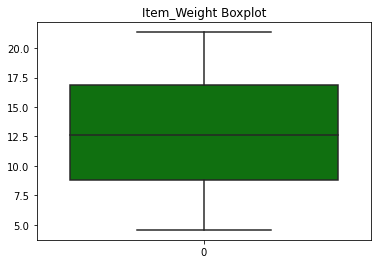

In [14]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=tr_df['Item_Weight'],orient="v", color = 'g')
plt.title("Item_Weight Boxplot")

There are no outliers so we will fill the missing data with the mean value for maximum efficiency:

In [15]:
#train
tr_df['Item_Weight'] = tr_df['Item_Weight'].fillna(
tr_df['Item_Weight'].dropna().mean())

#test
te_df['Item_Weight'] = te_df['Item_Weight'].fillna(
te_df['Item_Weight'].dropna().mean())

#checking if we filled missing values
tr_df['Item_Weight'].isnull().sum(),te_df['Item_Weight'].isnull().sum()

(0, 0)

### Now we can see using the `.info()` method we can see we have filled succesfully all mising the missing data for both sets:

In [16]:
print("train:\n")
print(tr_df.info())
print("\n\ntest:\n")
print(te_df.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

## Data Exploration

Firstly we need to split our data to categorical and numerical data.

In [17]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = tr_df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  tr_df[num]
#categoric df
BM_cat = tr_df[cat]

#print(num)
#print(cat)

[tr_df[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT046    930
 OUT049    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

We can See we have Repeating values with different names in the `Item_Fat_Content` column,
we will correct them using the using the `.replace()` method 

In [18]:
#train
tr_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
te_df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
tr_df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Let's take a look again at our data:

In [19]:
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


`Outlet_Establishment_Year` is quite useless as it is, making a new column with the age the new name will be `Outlet_Age`

In [20]:
#creating our new column for both datasets
tr_df['Outlet_Age'], te_df['Outlet_Age']= tr_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), te_df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

##uncomment to check result
#tr_df['Outlet_Age'].head
#te_df['Outlet_Age'].head

## Data Visualization 

### Univariate Plots
countplots for the categorical columns:

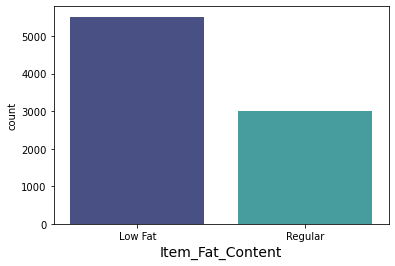

In [21]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=tr_df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

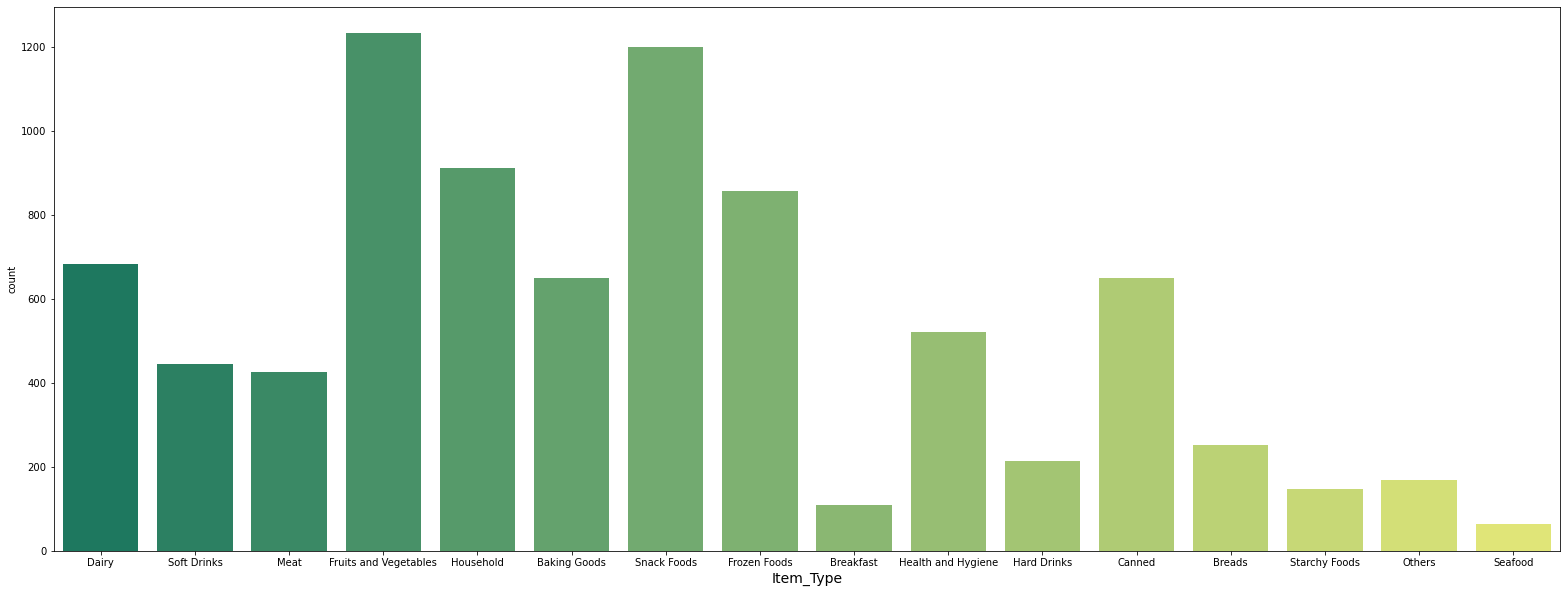

In [22]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=tr_df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

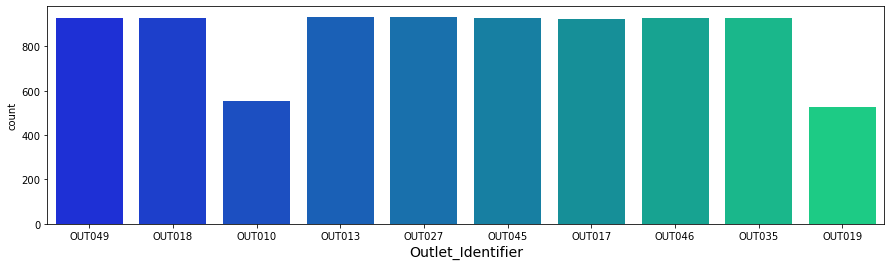

In [23]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=tr_df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

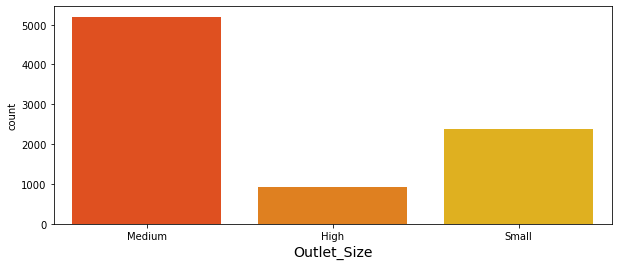

In [24]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=tr_df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

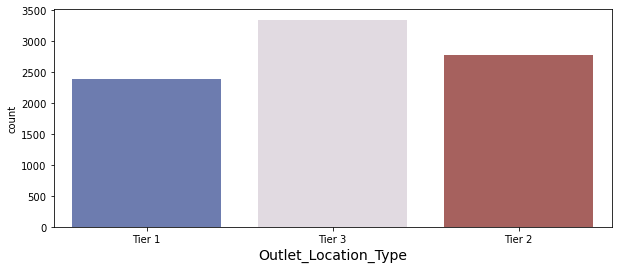

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=tr_df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

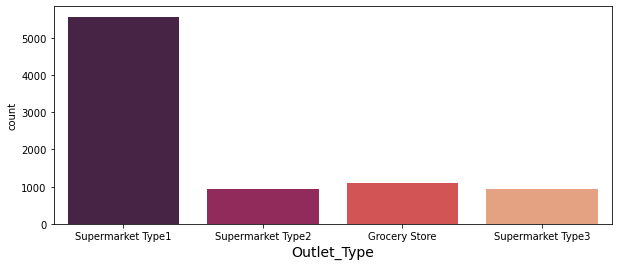

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=tr_df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

#### Categoric columns realizations

* `Item_Fat_Content` - Most items sold are low in fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`. 
* `Outlet_Identifier` - Sold items are ditributed evenly among outlets excluding `OUT010` and `OUT019` that are significanly lower. 
* `Outlet_Size` - Bigmart outlets are medium sized in our data. 
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

Now for the numerical columns:

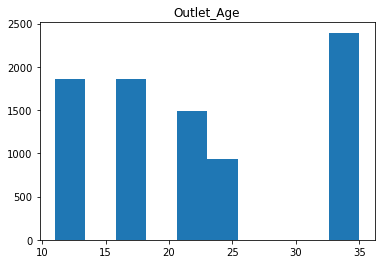

In [27]:
#list of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  tr_df[num]

plt.hist(tr_df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

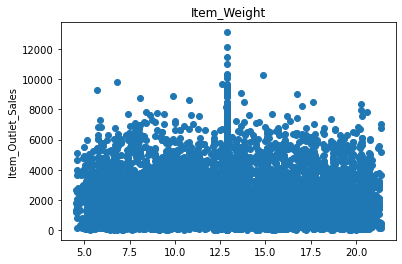

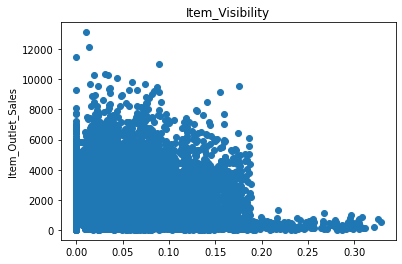

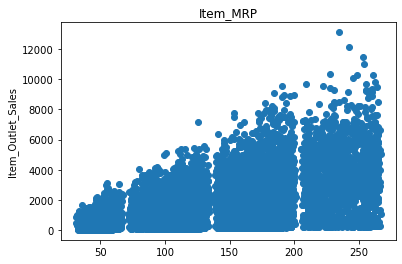

In [28]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

#### numeric columns Findings

* `Outlet_Age` - The most common outlets are 35 years old.
* `Item_Weight` - The data is kind of spreaded in nature, no specific pattern.
* `Item_Visibility` - Is spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
* `Item_MRP` - Items with higher MRP tend to sell better in most cases. 


### multivariate comparisons
Lets check the below relationships with `Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

No handles with labels found to put in legend.


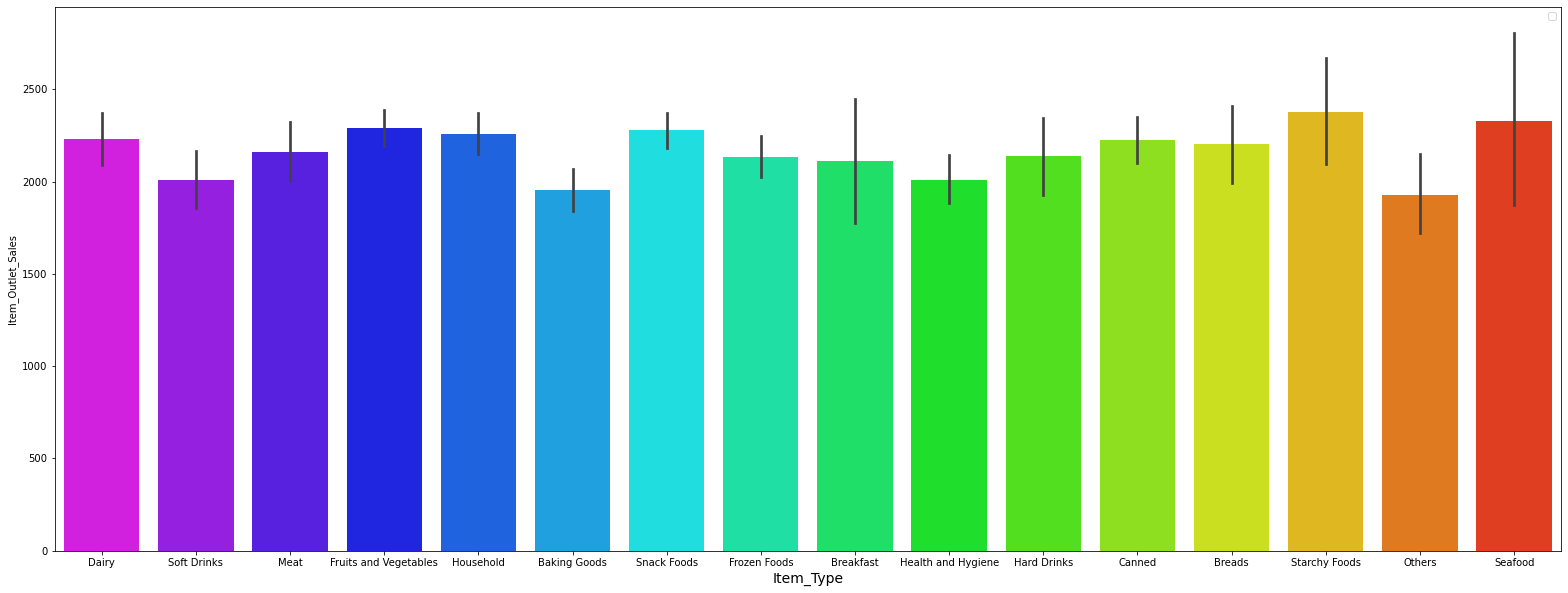

In [29]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=tr_df ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


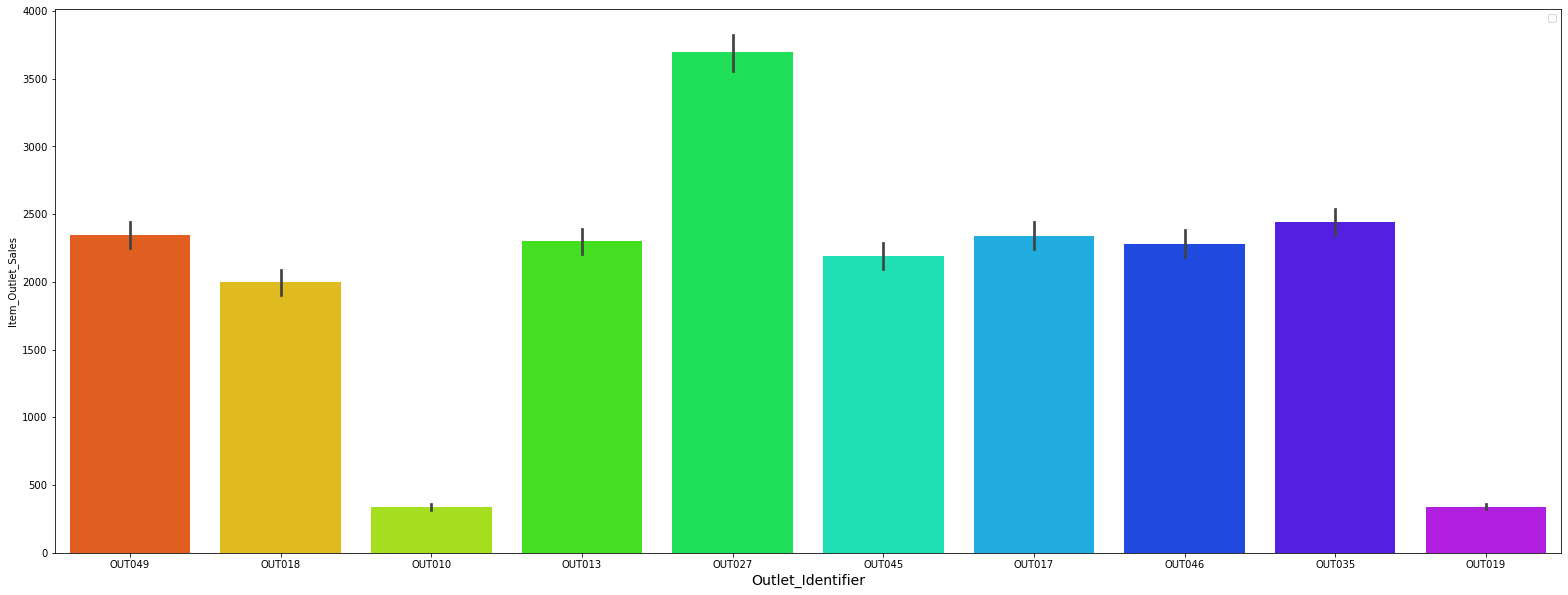

In [30]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=tr_df ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


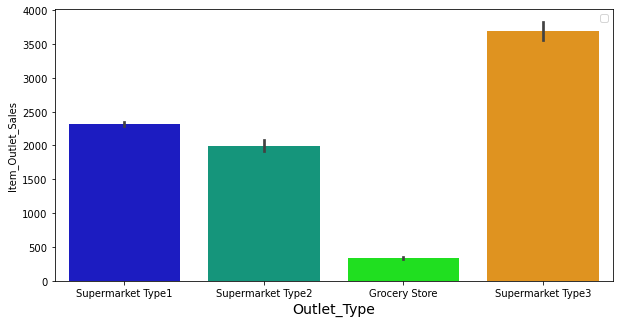

In [31]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=tr_df ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


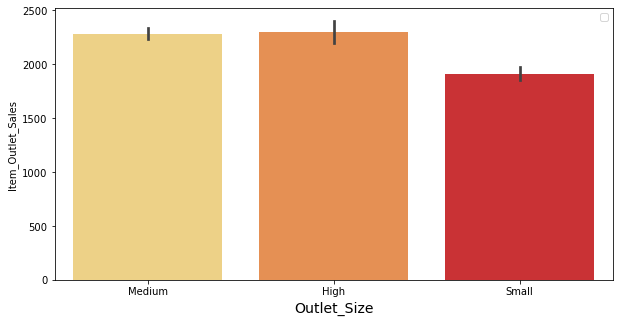

In [32]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=tr_df ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


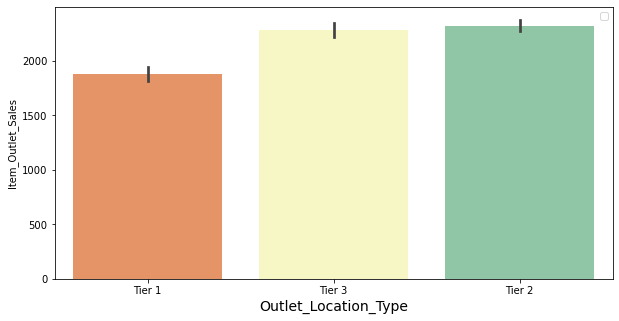

In [33]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=tr_df ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

#### Realizations:

* The difference in item types by sales is very small.
* Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
* Suprisingly supermarket type 3 is the most profitable and not type 1.
* Medium and high outlet sizes are pretty much even in sales.
* Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger). 

### Corraltion Matrix


<AxesSubplot:>

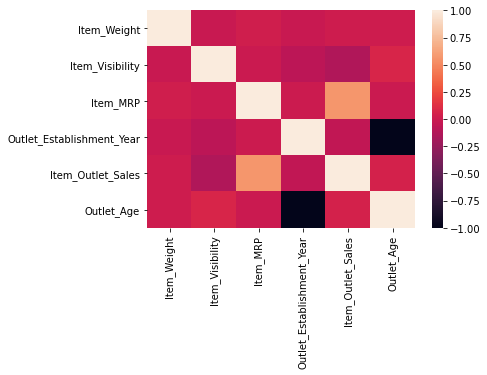

In [34]:
#plotting the correlation matrix
sns.heatmap(tr_df.corr() ,cmap='rocket')

**We can see `Item_Outlet_Sales` is highly correlated with `Item_MRP`**

### Feature Engineering

**Categorical values**:

We have 7 columns we need to delete or encode.

* Ordinal variables:
    * `Item_Fat_Content`  
    * `Outlet_Size`  
    * `Outlet_Location_Type`
    
* Nominal variables:
    * `Item_Identifier `  
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

**Numeric values**:

* From the numeric variables `Outlet_Establishment_Year` is no longer needed

**Conclusion:**

In my FE process i have decided:

1. The columns `Outlet_Establishment_Year`, `Item_Identifier ` and `Outlet_Identifier` don't have significant values so we will drop them.
2. All Ordinal variables will be Label encoded.
3. The columns `Outlet_Type` and `Item_Type`  will be One Hot encoded.



In [35]:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [36]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    tr_df[i] = le.fit_transform(tr_df[i])
    te_df[i] = le.fit_transform(te_df[i])
    
tr_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [37]:
#one hot encoding
cols = ['Item_Type','Outlet_Type']
# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(tr_df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.fit_transform(te_df[cols])).astype('int64')


#get feature columns
tr_oh.columns = OH_encoder.get_feature_names(cols)
te_oh.columns = OH_encoder.get_feature_names(cols)

# One-hot encoding removed index; put it back
tr_oh.index = tr_df.index
te_oh.index = te_df.index

# Add one-hot encoded columns to our main df new name: tr_fe, te_fe (means feature engeenired) 
tr_fe = pd.concat([tr_df, tr_oh], axis=1)
te_fe = pd.concat([te_df, te_oh], axis=1)

In [38]:
# Dropping irrelevant columns

tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [39]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


# Machine learning models


First we divide our dataset into two variables. `X` as the features we defined earlier and `y` as the `	Item_Outlet_Sales` the target value we want to predict.

**Assumptions:**

* This is a regression problem so we will use Regression methods.

* Train test split will be a 8:2 ratio respectively.

## Models we will use:

* **Linear Regression** 
* **Random Forest Regressor** 


## The Process of Modeling the Data:

1. Importing the model

2. Fitting the model

3. Predicting Item Outlet Sales

4. Regression metrics

### Score Metrics for Regression:

* **Mean Absolute Error (MAE)**  -  Mean of the absolute value of errors (absolute distance from true value):


* **Mean Squared Error (MSE)**  -  Mean of the squared value of errors (squared distance from true value):


* **R^2 (coefficient of determination)**  -  Regression score function.:

In [40]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [41]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## Linear Regression


linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).


In [42]:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 838.17

 Mean Squared Error: 1285746.35

 R^2 Score: 0.5593

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score: 0.558


### Csv results of the test for our model:

You can see each predition and true value side by side by the csv created in the output directory.

In [43]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.to_csv("Linear Regression.csv")     

## Random Forest Regressor

Random forest (Supervised Learning algorithm) - Uses ensemble method for classification and regression.
It constructs a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [44]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)


 Mean Absolute Error: 1030.27

 Mean Squared Error: 1964025.66

 R^2 Score: 0.3268

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.52
0.53
0.56
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5492


In [45]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")     

# Conclusion


In [46]:
MAE= [LR_MAE,RFR_MAE]
MSE= [LR_MSE,RFR_MSE]
R_2= [LR_R_2,RFR_R_2]
Cross_score= [LR_CS,RFR_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
0,Linear Regression,838.17,1285746.35,0.5593,0.558
1,Random Forest Regressor,1030.27,1964025.66,0.3268,0.592


## Realizations

* `Item_MRP` revamps Maximum Outlet sales (positive correlation with the target).
* Linear Regression has the better perfomance in most categories.
* only a one-third of the observed variation can be explained by the model's inputs in case of Random Forest Regressor, there for it's performance is not optimal even though it's cross validation is the higher.
* For better peformance this models need tuning like Grid Search.